# 1er livrable : Pré traitement
### Préparation de l'environnement

In [32]:
from PIL import Image
image = Image.open("Images/Images/2007041612_cam01p.jpg")

JPEG (528, 297) RGB


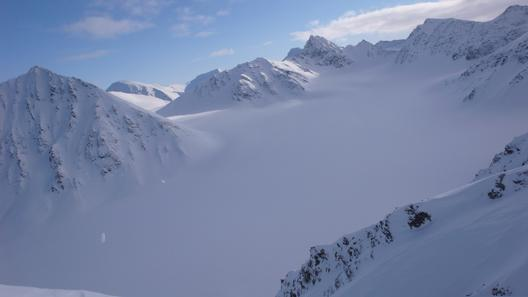

In [33]:
print(image.format, image.size, image.mode)
image

#### Les patches seront de taille 33, le plus grand PGCD entre 528 et 297

In [34]:
im_size = 33

#### Fonction d'extraction des patches dans une images :

In [35]:
def extractpatch(image, im_size):
    width, height = image.size
    patches = []

    for y in range(0, height, im_size):
        for x in range(0, width, im_size):
            box = (x, y, x + im_size, y + im_size)
            patch = image.crop(box)
            patches.append(patch)

    return patches

def patch2Vector(patch):

    return patch.flatten()


def vector2Patch(vector, patch_size):

    return vector.reshape((patch_size, patch_size))

#### Patched_image sera donc composé de 144 patches de l'image initiale (16*9)

In [36]:
patched_image = extractpatch(image, im_size)

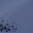

In [39]:
patched_image[143]

### Transformation en vecteurs colonnes :

In [40]:
vectorised_img = 

AttributeError: 'list' object has no attribute 'flatten'